## Problem Statement:



The Office of Foreign Labor Certification (OFLC) in the United States processes a rapidly growing number of employer applications each year for temporary and permanent foreign worker visas. In FY 2016 alone, OFLC handled over 775,000 applications covering nearly 1.7 million positions, a volume that continues to increase annually. Reviewing each application manually is becoming tedious and inefficient.

To address this challenge, OFLC has partnered with EasyVisa to develop a machine learning–based classification model that can analyze historical application data, identify the key factors influencing visa approval decisions, and automatically predict the likelihood of visa certification or denial for new applicants. The solution will:

Facilitate the visa approval process by reducing manual workload.

Enable data-driven shortlisting of applicants with higher chances of approval.

Provide insights into the most significant drivers of case status decisions.

This approach will help OFLC improve efficiency, maintain fairness, and ensure compliance with statutory requirements while meeting the growing demand for workforce certifications.

## Data Dictionary





case_id: ID of each visa application
continent: Information of continent the employee
education_of_employee: Information of education of the employee
has_job_experience: Does the employee has any job experience? Y= Yes; N = No
requires_job_training: Does the employee require any job training? Y = Yes; N = No
no_of_employees: Number of employees in the employer's company
yr_of_estab: Year in which the employer's company was established
region_of_employment: Information of foreign worker's intended region of employment in the US.
prevailing_wage: Average wage paid to similarly employed workers in a specific occupation in the area of intended employment. The purpose of the prevailing wage is to ensure that the foreign worker is not underpaid compared to other workers offering the same or similar service in the same area of employment.
unit_of_wage: Unit of prevailing wage. Values include Hourly, Weekly, Monthly, and Yearly.
full_time_position: Is the position of work full-time? Y = Full-Time Position; N = Part-Time Position
case_status: Flag indicating if the Visa was certified or denied

## Importing the Necessary Libraries

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn import tree
from sklearn.metrics import(
    confusion_matrix,
    accuracy_score,
    recall_score,
    precision_score,
    f1_score
)
from sklearn.ensemble import (
    BaggingClassifier,
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
# To ignore unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

## Loading the Dataset

In [60]:
# Mounting Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [61]:
# Loading the dataset
visadata = pd.read_csv('/content/drive/My Drive/EasyVisa.csv')


In [62]:
# copying data to another variable to avoid any changes to original data
data = visadata.copy()

## Overview of the Dataset
### Viewing first five, last five and some samples of dataset

In [63]:
# First five rows
data.head()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified


In [64]:
# Last five rows
data.tail()

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.57,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.79,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.85,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.77,Year,Y,Certified
25479,EZYV25480,Asia,Bachelor's,Y,N,3195,1960,Midwest,70876.91,Year,Y,Certified


In [65]:
# Twenty random samples
data.sample(20)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
4699,EZYV4700,Asia,Bachelor's,Y,N,4331,1954,South,26279.6000,Year,Y,Certified
7331,EZYV7332,North America,Doctorate,Y,N,1922,1998,Midwest,117316.6400,Year,Y,Certified
7310,EZYV7311,Asia,Master's,N,N,554,1999,Northeast,352.4315,Hour,Y,Certified
18996,EZYV18997,North America,Master's,Y,N,2795,2006,Northeast,11751.0300,Year,Y,Certified
19009,EZYV19010,Europe,Bachelor's,N,N,4674,2006,West,26779.6600,Year,Y,Certified
5600,EZYV5601,Europe,Master's,N,N,2711,1999,South,108086.5200,Year,Y,Certified
24196,EZYV24197,Asia,Master's,Y,N,3461,2010,Midwest,123642.6900,Year,Y,Certified
13042,EZYV13043,Asia,Bachelor's,N,N,5210,1976,South,112602.9900,Year,N,Denied
24022,EZYV24023,Asia,Bachelor's,Y,N,3283,1989,Northeast,11393.7200,Year,Y,Certified
1034,EZYV1035,Asia,Doctorate,Y,N,1945,2005,West,170656.5500,Year,N,Certified


## The dataset contains 'case_id' column as uniqueid column.

In [66]:
# Understanding the shape of dataset
data.shape

(25480, 12)

The dataset contains 25480 rows and 12 columns.

In [67]:
# Checking the datatypes of the columns for the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   case_id                25480 non-null  object 
 1   continent              25480 non-null  object 
 2   education_of_employee  25480 non-null  object 
 3   has_job_experience     25480 non-null  object 
 4   requires_job_training  25480 non-null  object 
 5   no_of_employees        25480 non-null  int64  
 6   yr_of_estab            25480 non-null  int64  
 7   region_of_employment   25480 non-null  object 
 8   prevailing_wage        25480 non-null  float64
 9   unit_of_wage           25480 non-null  object 
 10  full_time_position     25480 non-null  object 
 11  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 2.3+ MB


no_of_employees, yr_of_estab are of int type. prevailing_wage is of float type. And rest all columns are of object type.

In [68]:
# Checking the statistical summary of the data
data.describe().T

,count,mean,std,min,25%,50%,75%,max
no_of_employees,25480.0,5667.043210,22877.928848,-26.0000,1022.00,2109.00,3504.0000,602069.00
yr_of_estab,25480.0,1979.409929,42.366929,1800.0000,1976.00,1997.00,2005.0000,2016.00
prevailing_wage,25480.0,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27


It is observed that no_of_employees column contains negative values which is not possible in reality.
So, we will just remove the negative signs from no_of_employees.
Moreover, we will convert yr_of_estab column to categorical column.

## Checking for missing values

In [69]:
data.isnull().sum()

,0
case_id,0
continent,0
education_of_employee,0
has_job_experience,0
requires_job_training,0
no_of_employees,0
yr_of_estab,0
region_of_employment,0
prevailing_wage,0
unit_of_wage,0


It is observed that there are no null values in the dataset.

## Checking for duplicate values

In [70]:
data.duplicated().sum()

np.int64(0)

It is observed that there are no duplicate values in the dataset.

## Dropping the columns with all unique values

In [71]:
data.case_id.nunique()

25480

The case_id column contains all unique values, so we can drop it as it is of no use in our analysis.

In [72]:
data = data.drop('case_id', axis=1)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  int64  
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 2.1+ MB


So, case_id column is now removed.

As no_of_employees column contains negative values, we will remove the negative signs.

In [74]:
# Removing negative signs in no_of_employees column
data['no_of_employees'] = data["no_of_employees"].abs()

yr_of_estab column is of numerical types. We will convert it to categorical type for better analysis.

In [75]:
data['yr_of_estab'] = data['yr_of_estab'].astype('object')

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  object 
 6   region_of_employment   25480 non-null  object 
 7   prevailing_wage        25480 non-null  float64
 8   unit_of_wage           25480 non-null  object 
 9   full_time_position     25480 non-null  object 
 10  case_status            25480 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 2.1+ MB


In the dataset, unit_of_wage contains values like hourly, yearly, monthly, weekly. If we continue our analysis with these units, it will not help.
So, in order to continue with smooth analysis, we need to make the whole unit_of_wage column as yearly only and convert values in prevailing_wage to yearly for those rows which are not in yearly.

In [77]:
# Conversion Factors Mapping
conversion_factors = {
    "Year": 1,
    "Month": 12,
    "Week": 52,
    "Hour": 40 * 52
}

# Creating a new column for yearly wage
data["yearly_wage"] = data.apply(
    lambda row: row["prevailing_wage"] * conversion_factors.get(row["unit_of_wage"], 1),
    axis=1
)



In [78]:
# Printing sample

print(data[["prevailing_wage", "unit_of_wage", "yearly_wage"]].sample(10))

       prevailing_wage unit_of_wage  yearly_wage
8855         114615.23         Year    114615.23
24078         36822.17         Year     36822.17
3876          88757.17         Year     88757.17
4125         155365.31         Year    155365.31
13192         54215.88         Year     54215.88
23158        135293.48         Year    135293.48
19910         62051.71         Year     62051.71
9490          35298.80         Year     35298.80
5804          30508.02         Year     30508.02
13679         37633.61         Year     37633.61


In [79]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
continent,25480,6,Asia,16861,NaN,NaN,NaN,NaN,NaN,NaN,NaN
education_of_employee,25480,4,Bachelor's,10234,NaN,NaN,NaN,NaN,NaN,NaN,NaN
has_job_experience,25480,2,Y,14802,NaN,NaN,NaN,NaN,NaN,NaN,NaN
requires_job_training,25480,2,N,22525,NaN,NaN,NaN,NaN,NaN,NaN,NaN
no_of_employees,25480.0,NaN,NaN,NaN,5667.089207,22877.917453,11.0,1022.0,2109.0,3504.0,602069.0
yr_of_estab,25480.0,199.0,1998.0,1134.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
region_of_employment,25480,5,Northeast,7195,NaN,NaN,NaN,NaN,NaN,NaN,NaN
prevailing_wage,25480.0,NaN,NaN,NaN,74455.814592,52815.942327,2.1367,34015.48,70308.21,107735.5125,319210.27
unit_of_wage,25480,4,Year,22962,NaN,NaN,NaN,NaN,NaN,NaN,NaN
full_time_position,25480,2,Y,22773,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since the prevailing_wage column contained wages in multiple units (Hour, Week, Month, Year), we converted all values into a common scale (yearly_wage). After this transformation, the columns prevailing_wage and unit_of_wage no longer add value, so we dropped them to avoid redundancy and reduce dimensionality.

In [80]:
data.drop(['prevailing_wage', 'unit_of_wage'], axis=1,inplace=True)

In [81]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  object 
 6   region_of_employment   25480 non-null  object 
 7   full_time_position     25480 non-null  object 
 8   case_status            25480 non-null  object 
 9   yearly_wage            25480 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 1.9+ MB


# Exploratory Data Analysis

## Univariate Analysis

In [82]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="skyblue"
    )

    if bins:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="gray")
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="gray")

    # Add mean and median
    ax_hist2.axvline(data[feature].mean(), color="orange", linestyle="--")
    ax_hist2.axvline(data[feature].median(), color="purple", linestyle="-")

    # Set X-axis limit to 0–100
    ax_hist2.set_xlim(2, 60000)

    plt.show()


In [83]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Accent",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

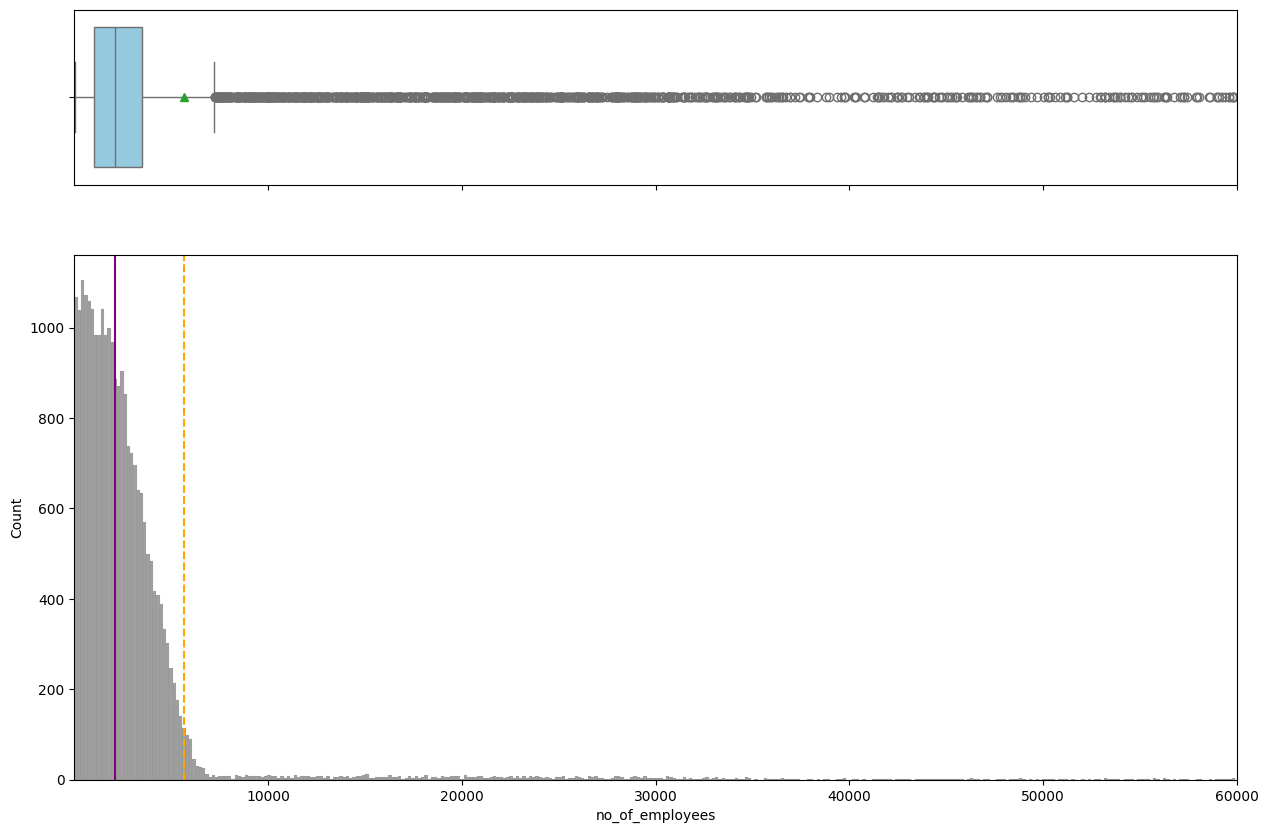

In [84]:
histogram_boxplot(data,"no_of_employees")

It is observed that no_of_employees data is right-skewed.Employees count is more in the range 0-800.

In [85]:
def histogram_boxplot2(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots

    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="skyblue"
    )

    if bins:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, color="gray")
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, color="gray")

    # Add mean and median
    ax_hist2.axvline(data[feature].mean(), color="orange", linestyle="--")
    ax_hist2.axvline(data[feature].median(), color="purple", linestyle="-")

    # Set X-axis limit to 0–100
    ax_hist2.set_xlim(50, 1500000)

    plt.show()


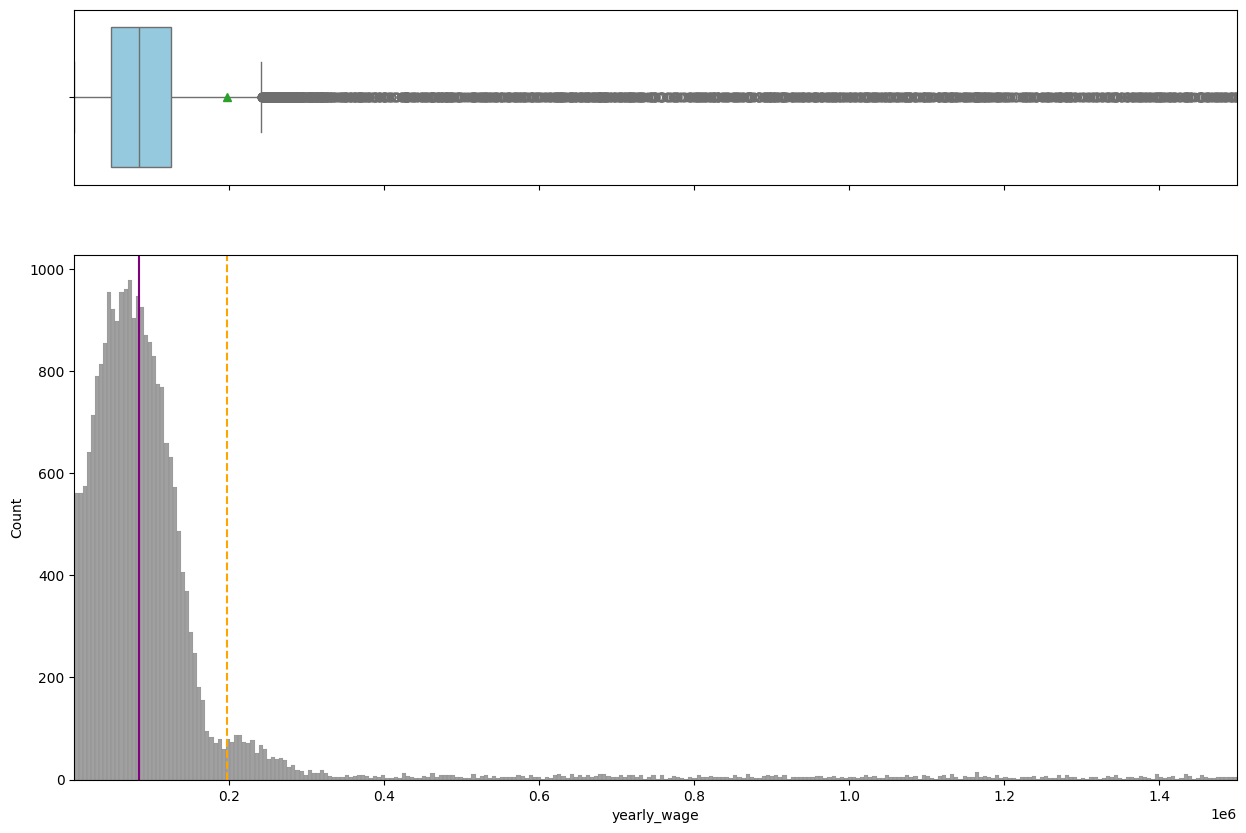

In [86]:
histogram_boxplot2(data,"yearly_wage")

It is observed that yearly wage data is right-skewed.

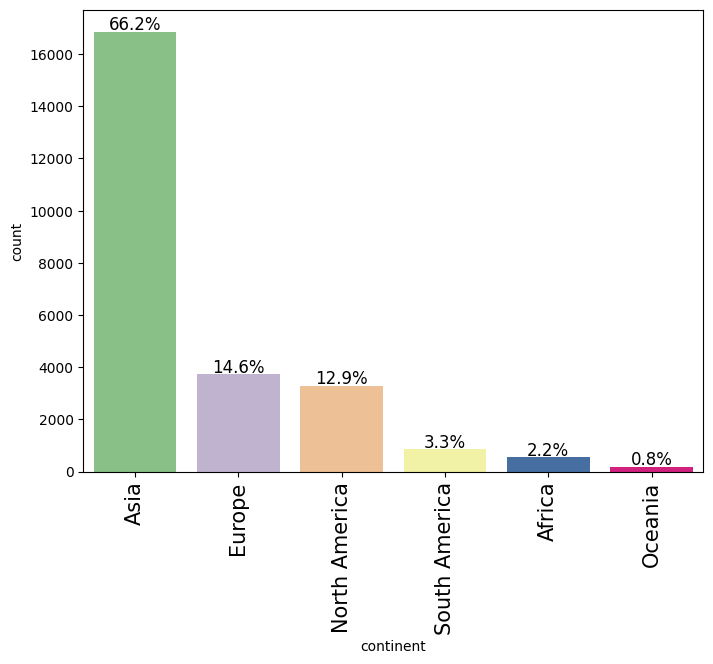

In [87]:
# Plotting countplot for categorical values
labeled_barplot(data, "continent", perc=True)

It is observed that percentage of employees from the continent Asia is highest and that from continent Oceania is the least.

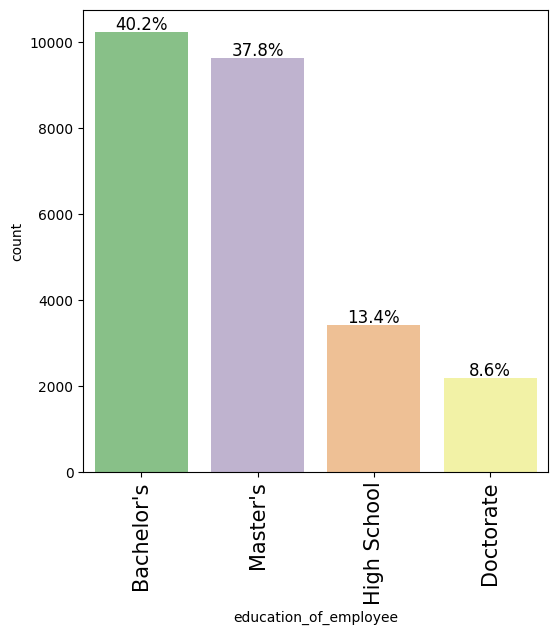

In [88]:
# Plotting countplot for categorical values
labeled_barplot(data, "education_of_employee", perc=True)

It is observed that about 40% of employees hold a Bachelor's degree, making it the most common educational qualification which is closely followed by 37% of employees with a Master's degree, highlighting that the workforce is predominantly made up of employees with undergraduate and postgraduate education.

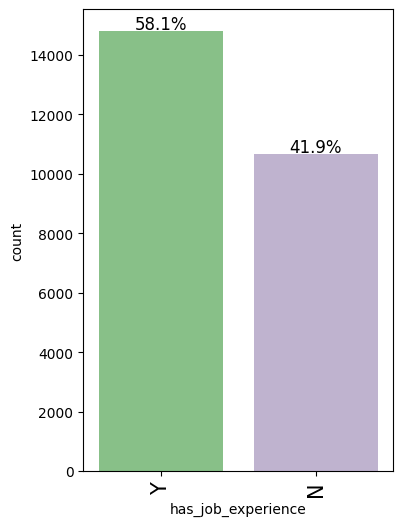

In [89]:
# Plotting countplot for categorical values
labeled_barplot(data, "has_job_experience", perc=True)

It is observed that nearly 58% of employees have job experience.

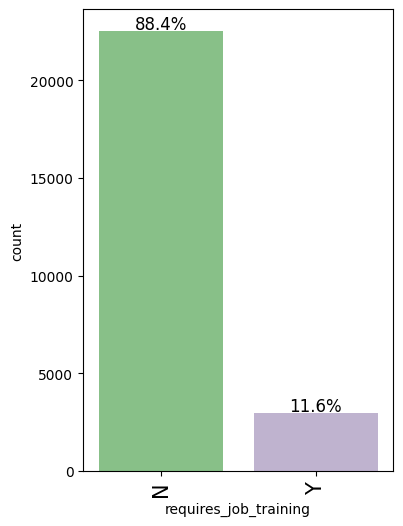

In [90]:
# Plotting countplot for categorical values
labeled_barplot(data, "requires_job_training", perc=True)

It is observed that nearly 11% of employees requires job training.

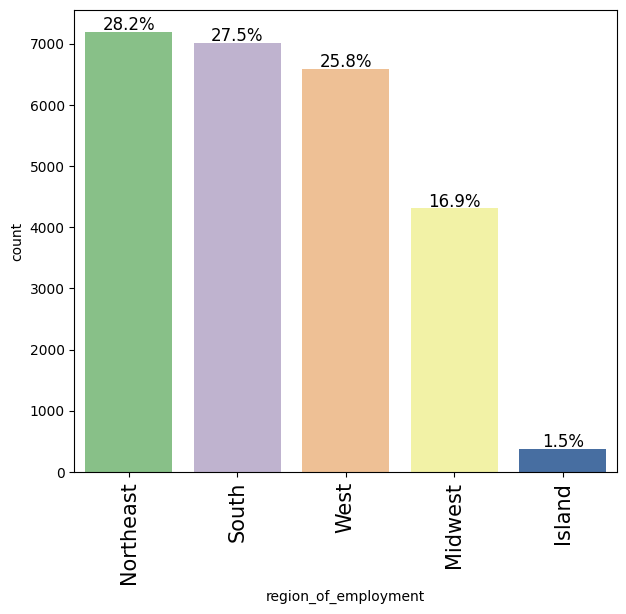

In [91]:
# Plotting countplot for categorical values
labeled_barplot(data, "region_of_employment", perc=True)

It is observed that nearly 28% of workers are employed in the NorthWest, making it the leading region followed by 27% in the South and 25% in the West.
The Island region has the least representation, with only about 1.5% of workers.

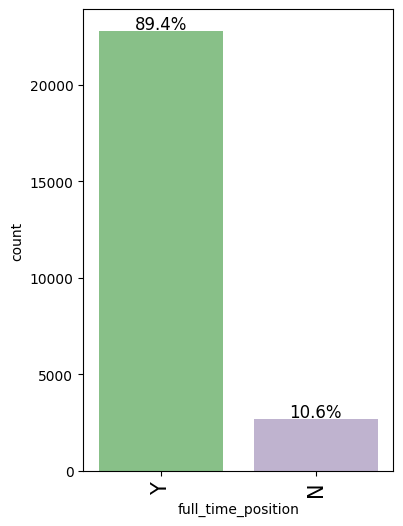

In [92]:
# Plotting countplot for categorical values
labeled_barplot(data, "full_time_position", perc=True)

It is observed that nearly 89% of employees have a full time position.

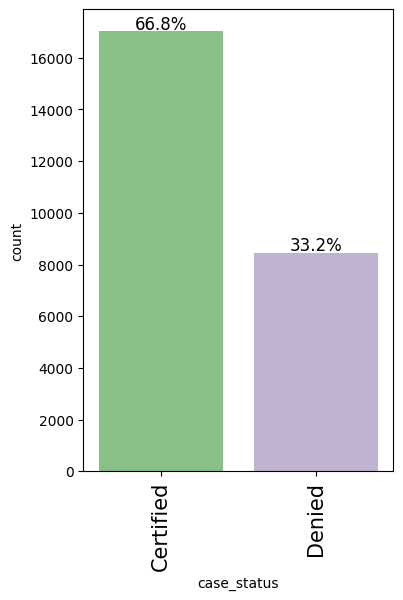

In [93]:
# Plotting countplot for categorical values
labeled_barplot(data, "case_status", perc=True)

Nearly 67% of cases have been Certified for Visa.

## Bivariate Analysis

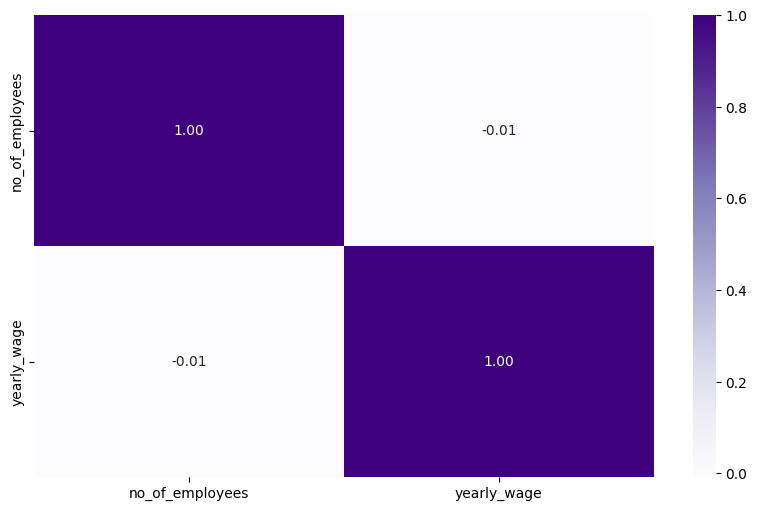

In [94]:
# Select only numeric columns
numeric_data = data.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numeric_data.corr(), annot=True,cmap='Purples', fmt=".2f")
plt.show()


A negative correlation has been observed between no of employees and yearly wage.

In [95]:
# Function to plot stacked bar plot
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

case_status            Certified  Denied    All
education_of_employee                          
All                        17018    8462  25480
Bachelor's                  6367    3867  10234
High School                 1164    2256   3420
Master's                    7575    2059   9634
Doctorate                   1912     280   2192
------------------------------------------------------------------------------------------------------------------------


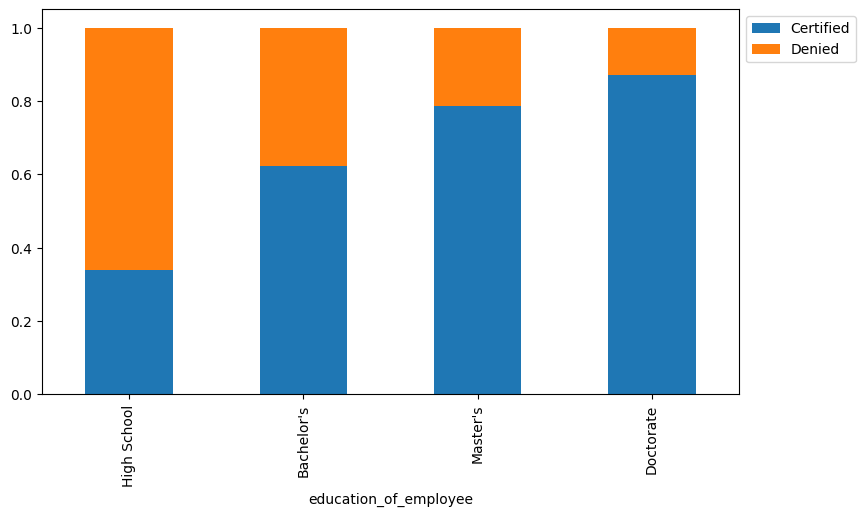

In [96]:
stacked_barplot(data, "education_of_employee", "case_status")

It is observed that visa application is getting certified more for the employees holding Doctrate Degree followed by employees holding Master's Degree.

case_status         Certified  Denied    All
has_job_experience                          
All                     17018    8462  25480
N                        5994    4684  10678
Y                       11024    3778  14802
------------------------------------------------------------------------------------------------------------------------


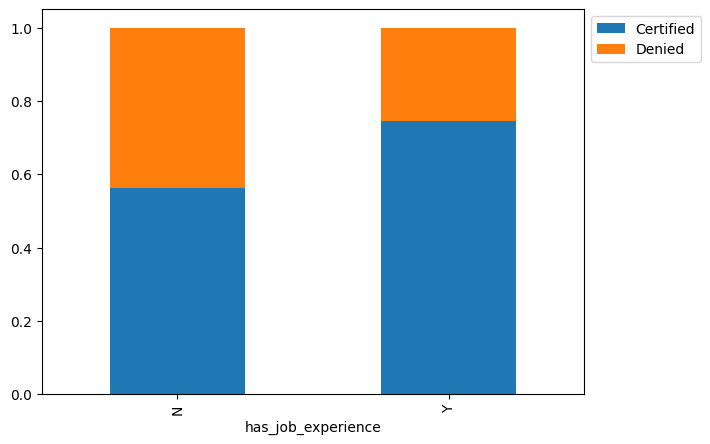

In [97]:
stacked_barplot(data, "has_job_experience", "case_status")

It is observed that employees having job experience are getting their visa certified more than the employees not having job experience.

## Multivariate Analysis

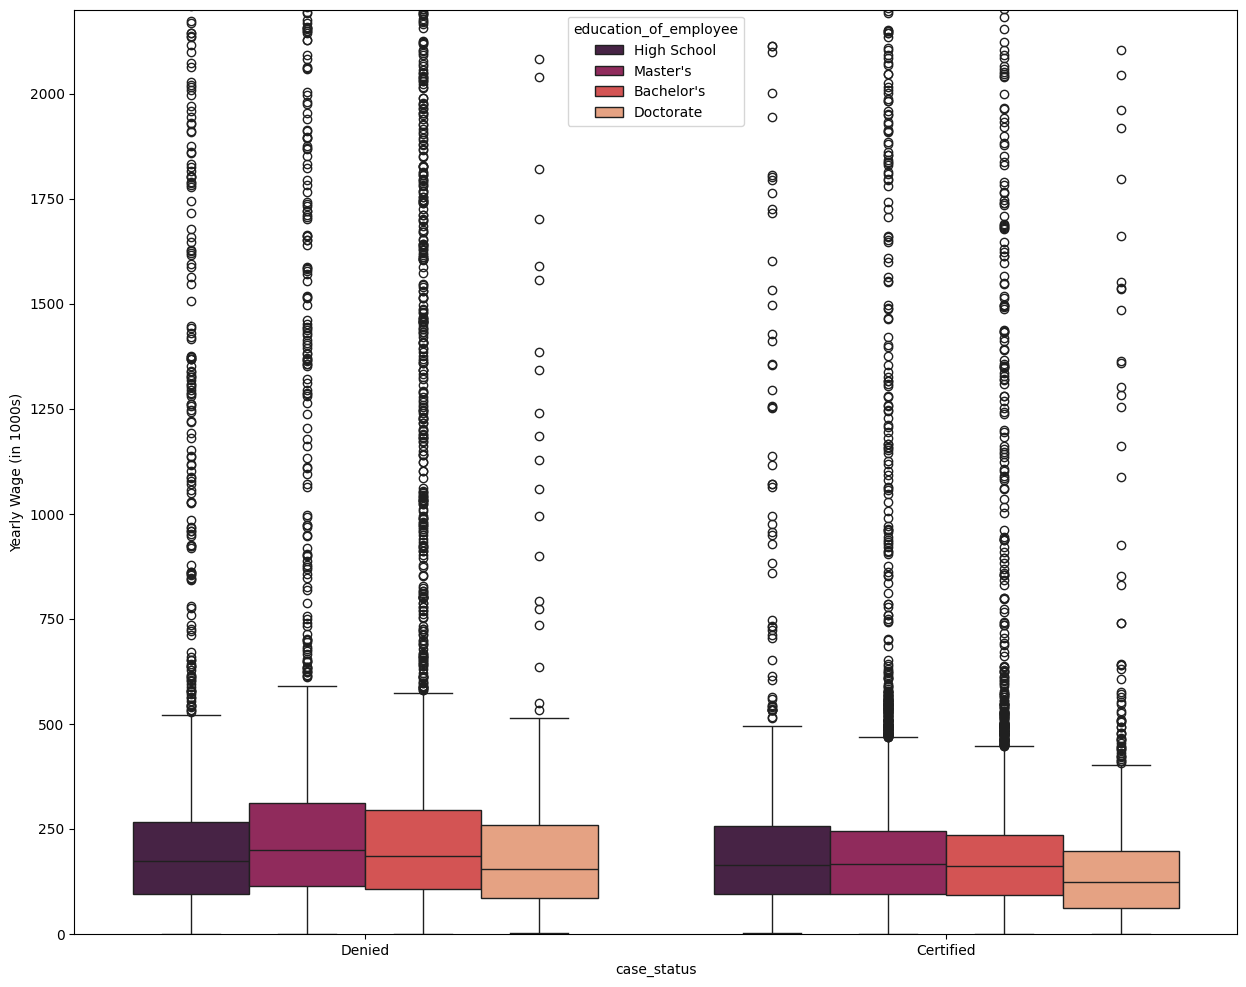

In [98]:
# Setting the plot size
fig = plt.figure(figsize=(15,12))
# Plotting the box plot
sns.boxplot(data=data, y=data["yearly_wage"]/500, x="case_status", hue="education_of_employee", palette='rocket')
plt.ylim(0, 2200) # Setting the y limit

plt.ylabel("Yearly Wage (in 1000s)")  # Update y-axis label
plt.show()



It is observed that outliers dominate the dataset, making median values more meaningful than means.

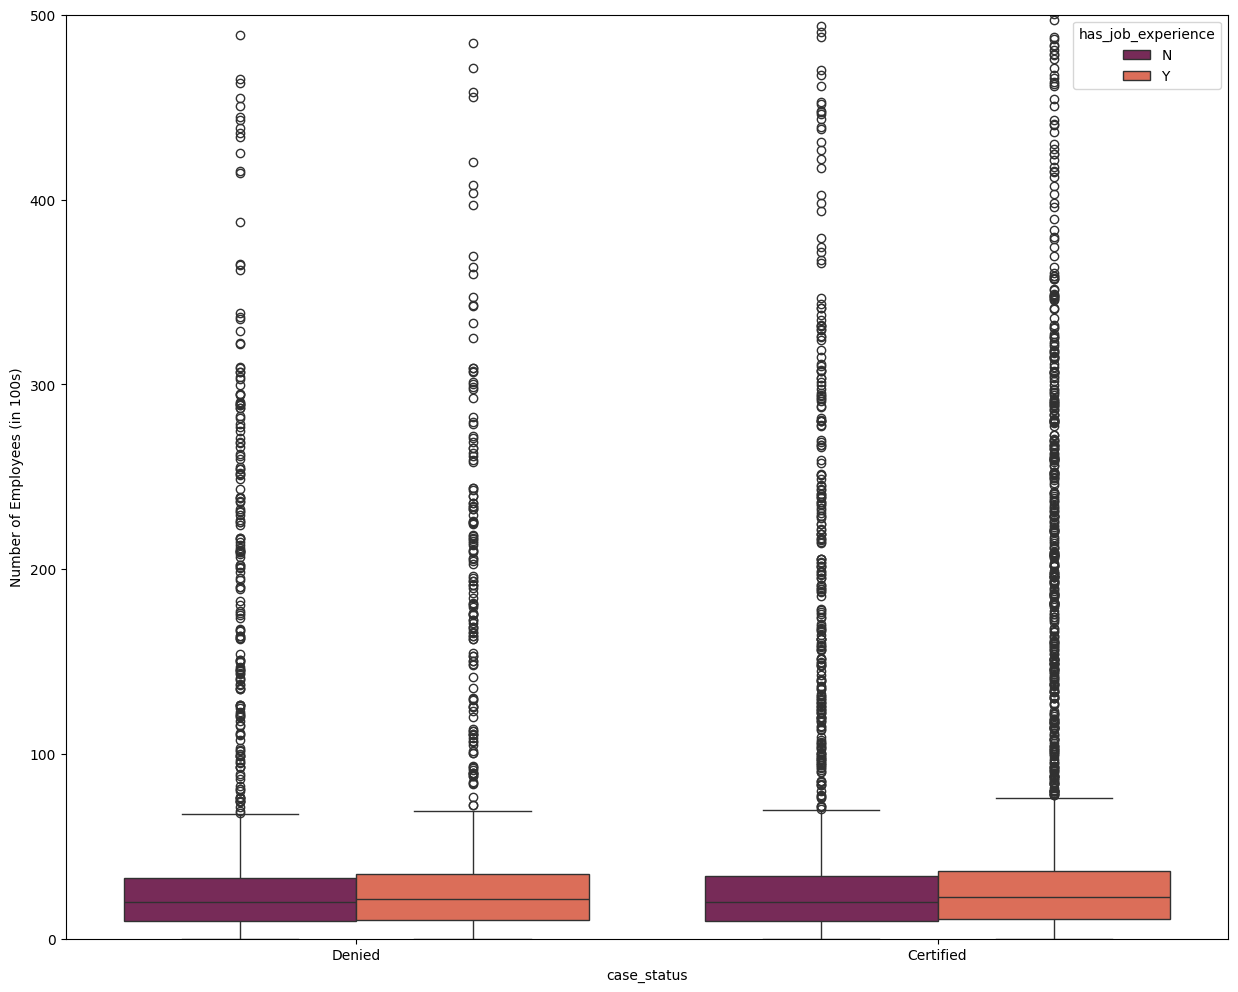

In [99]:
# Setting the plotsize
fig = plt.figure(figsize=(15,12))
# Plotting the boxplot
sns.boxplot(data=data, y=data["no_of_employees"]/100, x="case_status", hue="has_job_experience", palette='rocket')
plt.ylim(0,500) # Setting y limit

plt.ylabel("Number of Employees (in 100s)")  # Update y-axis label
plt.show()

Company size does not significantly affect case approval or denial. Both small and very large firms appear in both categories.The distributions for Y vs N overlap a lot, so company size is not strongly differentiated by job experience.

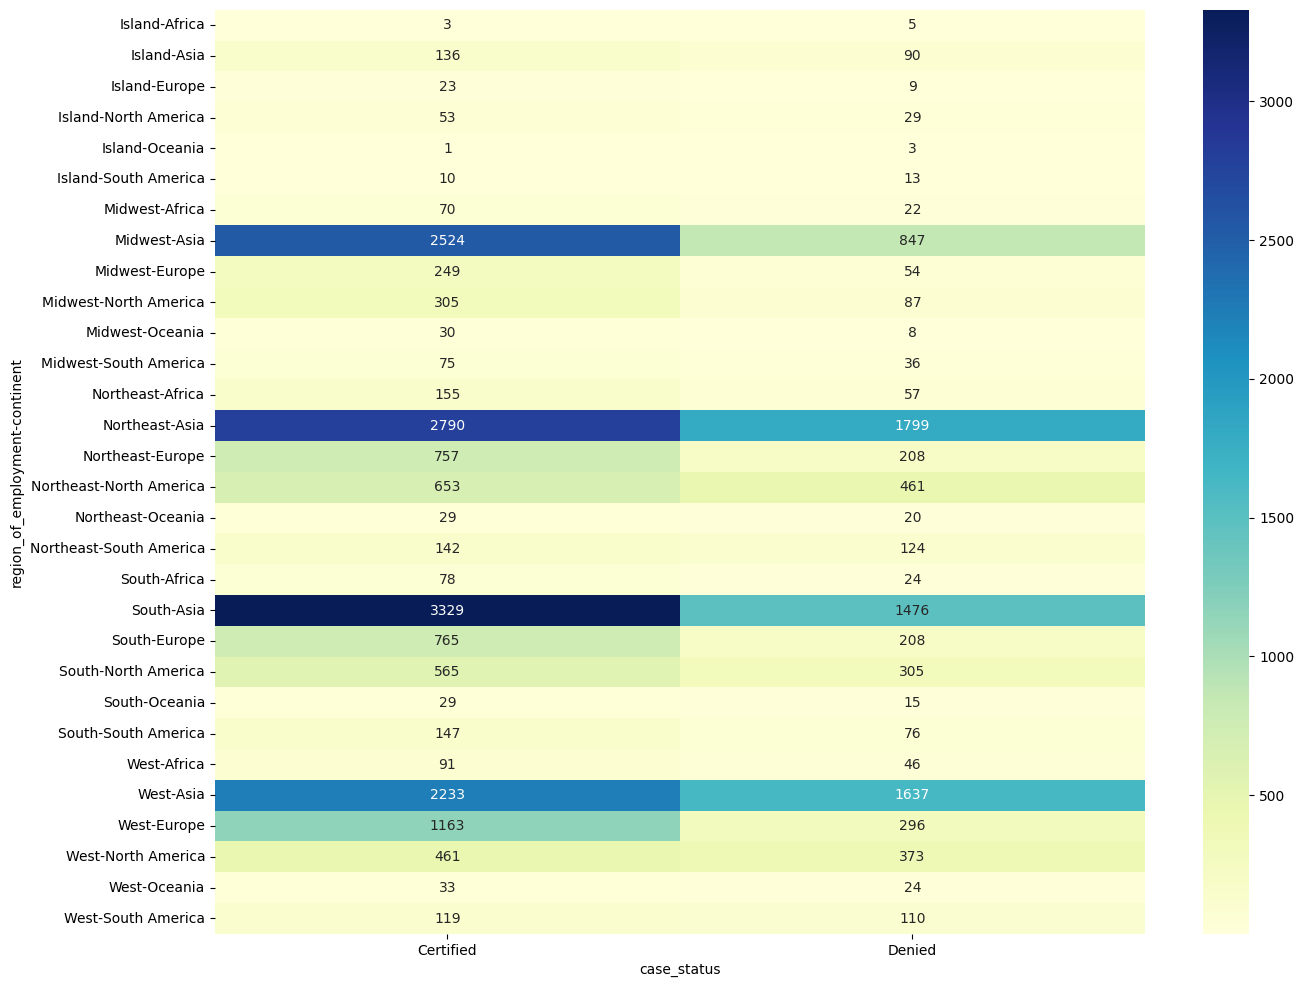

In [100]:
# Specifying the plotsize
fig = plt.figure(figsize=(15,12))
# Creating a cross-tabulation
ctab = pd.crosstab([data['region_of_employment'], data['continent']], data['case_status'])
# Plotting a heatmap of the crosstab
sns.heatmap(ctab, annot=True, fmt="d", cmap="YlGnBu")
plt.show()


It is observed that the majority of visa certifications are concentrated in South-Asia, Northeast-Asia, and West-Asia, West-Europe suggesting that these regions contribute a significant share of skilled workforce applications.

## Outlier Detection

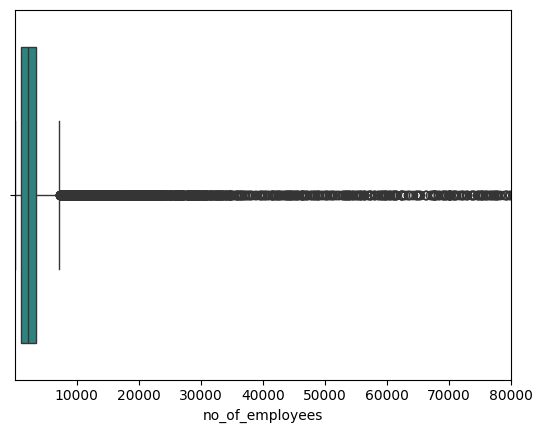

In [101]:
# outlier detection using boxplot

sns.boxplot(x=data['no_of_employees'], whis=1.5, palette='viridis')
plt.xlim(20,80000)
plt.show()

It is observed that no_of_employees column is having many outliers.
However, we will not treat them as they are proper values.

In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25480 entries, 0 to 25479
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   continent              25480 non-null  object 
 1   education_of_employee  25480 non-null  object 
 2   has_job_experience     25480 non-null  object 
 3   requires_job_training  25480 non-null  object 
 4   no_of_employees        25480 non-null  int64  
 5   yr_of_estab            25480 non-null  object 
 6   region_of_employment   25480 non-null  object 
 7   full_time_position     25480 non-null  object 
 8   case_status            25480 non-null  object 
 9   yearly_wage            25480 non-null  float64
dtypes: float64(1), int64(1), object(8)
memory usage: 1.9+ MB


# Data Preparation for Modelling

In [106]:
# Dropping the target variable from original data and storing it in X
X = data.drop(['case_status'],axis=1)

# Storing target variable column in y
y = data['case_status'].apply(lambda x: 1 if x == 'Certified' else 0) # Encoding Certified as 1 and Denied as 0

In [107]:
#  Splitting the original dataset into temporary training set and test set
X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1
)

# Splitting the temporary training set into actual training set and validation set
X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1
)

In [108]:
# Printing the number of rows in train, validation and test set
print("Number of rows in train data =", X_train.shape[0])
print("Number of rows in validation data =", X_val.shape[0])
print("Number of rows in test data =", X_test.shape[0])

Number of rows in train data = 15288
Number of rows in validation data = 5096
Number of rows in test data = 5096


In [109]:
# Using one-hot encoding in train set
X_train = pd.get_dummies(X_train, drop_first=True)
X_train = X_train.astype(float)

# Using one-hot encoding in validation and test set
X_val = pd.get_dummies(X_val, drop_first=True)
X_val = X_val.reindex(columns=X_train.columns, fill_value=0)
X_val = X_val.astype(float)

X_test = pd.get_dummies(X_test, drop_first=True)
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)
X_test = X_test.astype(float)

# Checking the shapes
print(X_train.shape, X_val.shape, X_test.shape)


(15288, 215) (5096, 215) (5096, 215)


In [110]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [111]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

## Model Building-Original Data

## Model Evaluation Criterion

**Model can make wrong predictions as:**
- Predicting visa of an employee as Denied but in reality, the employee meet the requirements to get his/her visa Certified(FN).
- Predicting visa of an employee as Certified but in reality, the employee doesnot meet the requirements to get his/her visa Certified(FP).

**Which case is more important?**

- If we predict visa of an employee as Denied but in reality, the employee meet the requirements to get his/her visa Certified, then the company will lose an employee who really deserves the visa and is a valuable employee.
- If we predict visa of an employee as Certified but in reality, the employee doesn't meet the requirements to get his/her visa Certified, then the company  might spend time, money, and HR/legal resources processing a candidate who ultimately gets rejected by authorities..
- Losing a valuable employee in this case is more vital.

**How to reduce the losses?**

The company would want the recall to be maximized, greater the recall score higher are the chances of minimizing the False Negatives.

In [112]:
# Creating an empty list to store all models
models = []

# Appending all models inside the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

# Printing the training performance

print("\nTraining Performance:\n")

for name,model in models:
  model.fit(X_train,y_train)
  scores = recall_score(y_train,model.predict(X_train))
  print("{}: {}".format(name,scores))

# Printing the validation performance

print("\nValidation Performance:\n")
for name,model in models:
  model.fit(X_train,y_train)
  scores = recall_score(y_val,model.predict(X_val))
  print("{}:{}".format(name,scores))



Training Performance:

Bagging: 0.9808485562757808
Random forest: 1.0
GBM: 0.8791985857395404
Adaboost: 0.879984285994893
dtree: 1.0

Validation Performance:

Bagging:0.75
Random forest:0.8407473309608541
GBM:0.8674377224199288
Adaboost:0.8793001186239621
dtree:0.7182680901542111


In [113]:
# Printing the difference between Training and Validation scores
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train, y_train)
    scores_train = recall_score(y_train, model.predict(X_train))
    scores_val = recall_score(y_val, model.predict(X_val))
    diff = scores_train - scores_val
    print("{}:Training Score:{:.4f}, Validation Score:{:.4f}, Difference:{:.4f}".format(name,scores_train,scores_val,diff))


Training and Validation Performance Difference:

Bagging:Training Score:0.9808, Validation Score:0.7500, Difference:0.2308
Random forest:Training Score:1.0000, Validation Score:0.8407, Difference:0.1593
GBM:Training Score:0.8792, Validation Score:0.8674, Difference:0.0118
Adaboost:Training Score:0.8800, Validation Score:0.8793, Difference:0.0007
dtree:Training Score:1.0000, Validation Score:0.7183, Difference:0.2817


It is observed that Adaboost model gives best performance followed by Gradient Boosting Model.

### Model Building - Oversampled Data

In [114]:
# Printing the count of lables in target column training sample before oversampling

print("Before Oversampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Oversampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

# Performing the Oversampling process using SMOTE(Synthetic Minority Oversampling Technique) to balance the dataset

sm = SMOTE(sampling_strategy= 1, k_neighbors=5, random_state=1)

X_train_over,y_train_over = sm.fit_resample(X_train,y_train)

# Printing the count of lables in target column training sample after oversampling

print("After oversampling count of label 'Yes': {}".format(sum(y_train_over==1)))
print("After oversampling count of label 'No': {}\n".format(sum(y_train_over==0)))

# Printing the shapes of independent variables train set and dependent variable train set

print("After oversampling shape of train_X : {}".format(X_train.shape))
print("After oversampling shape of train_y: {}\n".format(y_train.shape))


Before Oversampling, counts of label 'Yes': 10182
Before Oversampling, counts of label 'No': 5106 

After oversampling count of label 'Yes': 10182
After oversampling count of label 'No': 10182

After oversampling shape of train_X : (15288, 215)
After oversampling shape of train_y: (15288,)



In [115]:
# Creating an empty list to store all models
models = []

# Appending all models inside the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

# Printing the training performance
print("\nTraining Performance:\n")

for name,model in models:
  model.fit(X_train_over,y_train_over)
  scores = recall_score(y_train_over,model.predict(X_train_over))
  print("{}: {}".format(name,scores))

# Printing the validation performance

print("\nValidation Performance:\n")
for name,model in models:
  model.fit(X_train_over,y_train_over)
  scores = recall_score(y_val,model.predict(X_val))
  print("{}:{}".format(name,scores))



Training Performance:

Bagging: 0.9817324690630524
Random forest: 1.0
GBM: 0.8548418778236103
Adaboost: 0.8186014535454724
dtree: 1.0

Validation Performance:

Bagging:0.772835112692764
Random forest:0.8354092526690391
GBM:0.8434163701067615
Adaboost:0.8220640569395018
dtree:0.7425860023724793


In [116]:
# Printing the difference between Training and Validation scores
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_over, y_train_over)
    scores_train = recall_score(y_train_over, model.predict(X_train_over))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference2 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference2))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9817, Validation Score: 0.7728, Difference: 0.2089
Random forest: Training Score: 1.0000, Validation Score: 0.8354, Difference: 0.1646
GBM: Training Score: 0.8548, Validation Score: 0.8434, Difference: 0.0114
Adaboost: Training Score: 0.8186, Validation Score: 0.8221, Difference: -0.0035
dtree: Training Score: 1.0000, Validation Score: 0.7426, Difference: 0.2574


### Model Building - Undersampled Data:

In [117]:
# Initializing RandomUnderSampler for undersampling
rus = RandomUnderSampler(random_state=1)

# Fitting the train set to model
X_train_un,y_train_un = rus.fit_resample(X_train,y_train)

In [118]:
# Printing the count of lables in target column training sample before undersampling

print("Before Under Sampling, counts of label 'Yes': {}".format(sum(y_train == 1)))
print("Before Under Sampling, counts of label 'No': {} \n".format(sum(y_train == 0)))

# Printing the count of lables in target column training sample after undersampling

print("After Under Sampling, counts of label 'Yes': {}".format(sum(y_train_un == 1)))
print("After Under Sampling, counts of label 'No': {} \n".format(sum(y_train_un == 0)))

# Printing the shapes of independent variables train set and dependent variable train set

print("After Under Sampling, the shape of train_X: {}".format(X_train_un.shape))
print("After Under Sampling, the shape of train_y: {} \n".format(y_train_un.shape))

Before Under Sampling, counts of label 'Yes': 10182
Before Under Sampling, counts of label 'No': 5106 

After Under Sampling, counts of label 'Yes': 5106
After Under Sampling, counts of label 'No': 5106 

After Under Sampling, the shape of train_X: (10212, 215)
After Under Sampling, the shape of train_y: (10212,) 



In [119]:
# Empty list to store all the models
models = []

# Appending models into the list
models.append(("Bagging", BaggingClassifier(estimator=DecisionTreeClassifier(random_state=1, class_weight='balanced'), random_state=1)))
models.append(("Random forest", RandomForestClassifier(random_state=1, class_weight='balanced')))
models.append(("GBM", GradientBoostingClassifier(random_state=1)))
models.append(("Adaboost", AdaBoostClassifier(random_state=1)))
models.append(("dtree", DecisionTreeClassifier(random_state=1, class_weight='balanced')))

# Printing the training performance
print("\n" "Training Performance:" "\n")
for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_train_un, model.predict(X_train_un))
    print("{}: {}".format(name, scores))


# Printing the validation performance

print("\n" "Validation Performance:" "\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores = recall_score(y_val, model.predict(X_val))
    print("{}: {}".format(name, scores))


Training Performance:

Bagging: 0.9625930278104191
Random forest: 1.0
GBM: 0.7461809635722679
Adaboost: 0.7032902467685076
dtree: 1.0

Validation Performance:

Bagging: 0.6058718861209964
Random forest: 0.6832740213523132
GBM: 0.7250889679715302
Adaboost: 0.6886120996441281
dtree: 0.6209964412811388


In [120]:
# Printing the difference between Training and Validation scores
print("\nTraining and Validation Performance Difference:\n")

for name, model in models:
    model.fit(X_train_un, y_train_un)
    scores_train = recall_score(y_train_un, model.predict(X_train_un))
    scores_val = recall_score(y_val, model.predict(X_val))
    difference3 = scores_train - scores_val
    print("{}: Training Score: {:.4f}, Validation Score: {:.4f}, Difference: {:.4f}".format(name, scores_train, scores_val, difference3))


Training and Validation Performance Difference:

Bagging: Training Score: 0.9626, Validation Score: 0.6059, Difference: 0.3567
Random forest: Training Score: 1.0000, Validation Score: 0.6833, Difference: 0.3167
GBM: Training Score: 0.7462, Validation Score: 0.7251, Difference: 0.0211
Adaboost: Training Score: 0.7033, Validation Score: 0.6886, Difference: 0.0147
dtree: Training Score: 1.0000, Validation Score: 0.6210, Difference: 0.3790


### Tuning  Gradient Boosting model with Undersampled Data

In [121]:
# Defining the model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init":[AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators":np.arange(125,175,25),
    "learning_rate":[0.01,0.2,0.05,1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model,param_distributions=param_grid,scoring=scorer,n_iter=50,cv=5,random_state=1,n_jobs=-1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

# Printing the best performance from randomsearch
print("Best performance are {} with best cv score{}".format(randomized_cv.best_params_,randomized_cv.best_score_))

Best performance are {'subsample': 0.9, 'n_estimators': np.int64(150), 'max_features': 0.5, 'learning_rate': 0.01, 'init': AdaBoostClassifier(random_state=1)} with best cv score0.7520553695295085


In [122]:
# Defining a Gradient Boosting Classifier with tuned hyperparameters
tuned_gbm1 = GradientBoostingClassifier(
    random_state=1,
    subsample=0.9,
    n_estimators=150,
    learning_rate=0.01,
    max_features=0.5,
    init=AdaBoostClassifier(random_state=1)
)

# Train the tuned Gradient Boosting model on the training data
tuned_gbm1.fit(X_train_un,y_train_un)

GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.01, max_features=0.5,
                           n_estimators=150, random_state=1, subsample=0.9)

In [123]:
# Checking model's performance on training set
gbmtuned_train = model_performance_classification_sklearn(tuned_gbm1,X_train_un,y_train_un)
gbmtuned_train

,Accuracy,Recall,Precision,F1
0,0.708089,0.754994,0.690242,0.721167


In [124]:
# Checking model's performance on validation set
gbmtuned_val = model_performance_classification_sklearn(tuned_gbm1,X_val,y_val)
gbmtuned_val

,Accuracy,Recall,Precision,F1
0,0.712323,0.747924,0.803697,0.774808


### Tuning Gradient Boosting model with Oversampled data

In [125]:
# Defining the model
Model = GradientBoostingClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "init":[AdaBoostClassifier(random_state=1),DecisionTreeClassifier(random_state=1)],
    "n_estimators":np.arange(125,175,25),
    "learning_rate":[0.01,0.2,0.05,1],
    "subsample":[0.8,0.9,1],
    "max_features":[0.5,0.7,1]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model,param_distributions=param_grid,scoring=scorer,n_iter=50,cv=5,random_state=1,n_jobs=-1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_over,y_train_over)

# Printing the best performance from randomsearch
print("Best performance are {} with best cv score{}".format(randomized_cv.best_params_,randomized_cv.best_score_))

Best performance are {'subsample': 0.8, 'n_estimators': np.int64(125), 'max_features': 1, 'learning_rate': 0.05, 'init': AdaBoostClassifier(random_state=1)} with best cv score0.8854778445516299


In [126]:
# Defining a Gradient Boosting Classifier with tuned hyperparameters
tuned_gbm2 = GradientBoostingClassifier(
    init=AdaBoostClassifier(random_state=1),
    n_estimators=125,
    learning_rate=0.05,
    subsample=0.8,
    max_features=1
)

# Fitting the model

tuned_gbm2.fit(X_train_over,y_train_over)


GradientBoostingClassifier(init=AdaBoostClassifier(random_state=1),
                           learning_rate=0.05, max_features=1, n_estimators=125,
                           subsample=0.8)

In [127]:
# Checking model's performance on training set
gbmtuned2_train = model_performance_classification_sklearn(tuned_gbm2,X_train_un,y_train_un)
gbmtuned2_train

,Accuracy,Recall,Precision,F1
0,0.665883,0.882099,0.615805,0.725282


In [128]:
# Checking model's performance on validation set
gbmtuned2_val = model_performance_classification_sklearn(tuned_gbm2,X_val,y_val)
gbmtuned2_val

,Accuracy,Recall,Precision,F1
0,0.718995,0.873072,0.745694,0.804372


### Tuning AdaBoostClassifier model with Undersampled data

In [129]:
# Defining the model
Model = AdaBoostClassifier(random_state=1)

# Parameter grid to pass in RandomSearchCV
param_grid = {
    "n_estimators":np.arange(10,40,10),
    "learning_rate":[0.1,0.01,0.2,0.05,1],
    "estimator":[
        DecisionTreeClassifier(max_depth=1,random_state=1),
        DecisionTreeClassifier(max_depth=2,random_state=1),
        DecisionTreeClassifier(max_depth=3,random_state=1),
    ]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling RandomizedSearchCV
randomized_cv = RandomizedSearchCV(estimator=Model,param_distributions=param_grid,scoring=scorer,n_iter=50,cv=5,random_state=1,n_jobs=-1)

# Fitting parameters in RandomizedSearchCV
randomized_cv.fit(X_train_un,y_train_un)

# Printing the best performance from randomsearch
print("Best parameters are {} with CV score {}".format(randomized_cv.best_params_,randomized_cv.best_score_))

Best parameters are {'n_estimators': np.int64(10), 'learning_rate': 0.1, 'estimator': DecisionTreeClassifier(max_depth=1, random_state=1)} with CV score 0.9353693761727786


In [130]:
# Defining an AdaBoostClassifier with tuned hyperparameters
tuned_adb = AdaBoostClassifier(
    random_state=1,
    n_estimators=10,
    learning_rate=0.1,
    estimator=DecisionTreeClassifier(max_depth=1,random_state=1)
)

# Fitting the model
tuned_adb.fit(X_train_un,y_train_un)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1,
                                                    random_state=1),
                   learning_rate=0.1, n_estimators=10, random_state=1)

In [131]:
# Checking model's performance on training set
adb_train = model_performance_classification_sklearn(tuned_adb,X_train_un,y_train_un)
adb_train

,Accuracy,Recall,Precision,F1
0,0.60282,0.93537,0.56175,0.70194


In [132]:
# Checking model's performance on validation set
adb_val = model_performance_classification_sklearn(tuned_adb, X_val, y_val)
adb_val

,Accuracy,Recall,Precision,F1
0,0.703493,0.928826,0.711333,0.805659


## Model Comparison and Final Model Selection

In [133]:
# Concatenating training performance metrics from multiple models into a single DataFrame
models_train_comp_df = pd.concat(
    [
        gbmtuned_train.T,   # Transposing Gradient Boosting (undersampled) training metrics
        gbmtuned2_train.T,  # Transposing Gradient Boosting (oversampled) training metrics
        adb_train.T         # Transposing AdaBoost (undersampled) training metrics
    ],
    axis=1  # Concatenating columns-wise so each model's metrics become separate columns
)

# Renaming the columns to meaningful model names for easier comparison
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data"
]

# Printing a header
print("Training Performance Comparsion:")

# Displaying the combined DataFrame showing training performance metrics (Accuracy, Recall, Precision, F1)
models_train_comp_df


Training Performance Comparsion:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.708089,0.665883,0.60282
Recall,0.754994,0.882099,0.93537
Precision,0.690242,0.615805,0.56175
F1,0.721167,0.725282,0.70194


In [134]:
# Concatenating validation performance metrics from multiple models into a single DataFrame
models_train_comp_df = pd.concat(
    [
        gbmtuned_val.T,   # Transposing Gradient Boosting (undersampled) validation metrics
        gbmtuned2_val.T,  # Transposing Gradient Boosting (oversampled) validation metrics
        adb_val.T         # Transposing AdaBoost (undersampled) validation metrics
    ],
    axis=1  # Concatenating columns-wise so each model's metrics become separate columns
)

# Renaming the columns to meaningful model names for easier comparison
models_train_comp_df.columns = [
    "Gradient boosting trained with Undersampled data",
    "Gradient boosting trained with Oversampled data",
    "AdaBoost trained with Undersampled data"
]

# Printing a header
print("Validation Performance Comparsion:")

# Displaying the combined DataFrame showing validation performance metrics (Accuracy, Recall, Precision, F1)
models_train_comp_df

Validation Performance Comparsion:


,Gradient boosting trained with Undersampled data,Gradient boosting trained with Oversampled data,AdaBoost trained with Undersampled data
Accuracy,0.712323,0.718995,0.703493
Recall,0.747924,0.873072,0.928826
Precision,0.803697,0.745694,0.711333
F1,0.774808,0.804372,0.805659


- Gradient Boosting model trained with oversampled data has generalised performance, so let's consider it as the best model.

In [135]:
# Checking model's performance on test set
grad_test = model_performance_classification_sklearn(tuned_gbm2, X_test, y_test)
grad_test

,Accuracy,Recall,Precision,F1
0,0.725078,0.867494,0.761338,0.810957


- The Gradient Boosting model trained on oversampled data has given ~87% recall on the test set
- This performance is in line with what we achieved with this model on the train and validation sets
- So, this is a generalized model

### Feature Importance

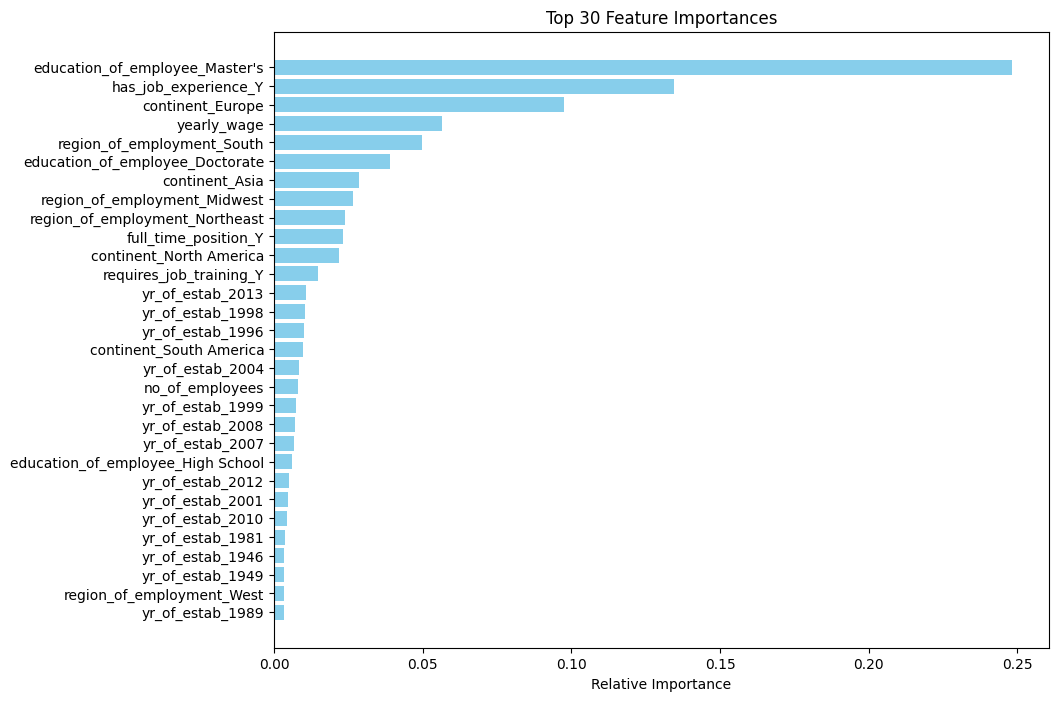

In [136]:
# Getting the feature names from the training dataset
feature_names = X_train.columns

# Getting feature importances from the trained Gradient Boosting model
importances = tuned_gbm2.feature_importances_

# Getting the indices that would sort the importances array in ascending order
indices = np.argsort(importances)

# Number of top features to display in the plot
N = 30
# Selecting the indices of the top N most important features (highest importance)
top_indices = indices[-N:]

# Creating a horizontal bar plot for the top N feature importances
plt.figure(figsize=(10, 8))
plt.title(f"Top {N} Feature Importances")  # Adding title to the plot
plt.barh(range(N), importances[top_indices], color="skyblue", align="center")
# Labelling the y-axis with feature names corresponding to the top indices
plt.yticks(range(N), [feature_names[i] for i in top_indices])
plt.xlabel("Relative Importance")  # Label for x-axis
plt.show()  # Displaying the plot



- We can see that education_of_employee_Master's, has_job_experience_Y, continent_Europe, yearly_wage are the most important features for making predictions

# Business Insights and Recommendations

* By using the model, company can prioritize applicants likely to get visa certification. This will reduce manual workload and speed up decision-making.

* Company should pay attention to important features like education level (Master’s), job experience, wage, location and use these insights to guide shortlisting and policy decisions.

* Automating low risk approvals and flagging complex cases for detailed review will optimize resource allocation and reduce processing time.